In [36]:
import twstock
import pandas as pd
# 導入twstock及pandas模組，pandas模組縮寫為pd

target_stock = '0050'  #股票代號變數
stock = twstock.Stock(target_stock)  #告訴twstock我們要查詢的股票
target_price = stock.fetch_from(2005, 5)  #取用2020/05至今每天的交易資料

name_attribute = [
    'Date', 'Capacity', 'Turnover', 'Open', 'High', 'Low', 'Close', 'Change',
    'Transcation'
]  #幫收集到的資料設定表頭

df = pd.DataFrame(columns=name_attribute, data=target_price)
#將twstock抓到的清單轉成Data Frame格式的資料表
print(df)

import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()




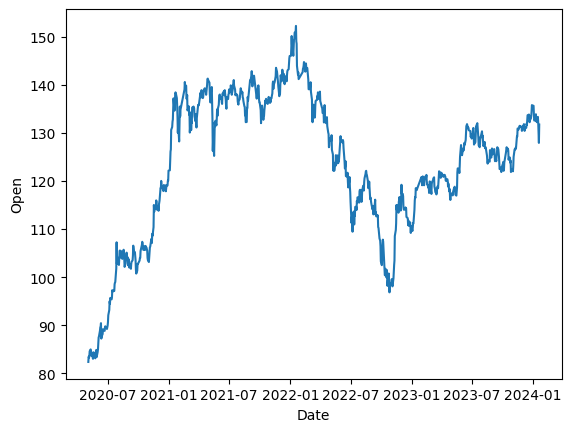

In [51]:
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

In [42]:
from datetime import datetime
#國歷轉西元
def taiwan_to_ad(date_str):
    date_str = date_str.replace('年','-')
    date_str = date_str.replace('月','-')
    date_str = date_str.replace('日','')

    sp = date_str.split('-')
    result  = str(int(sp[0])+1911) + '-' + sp[1] + '-' + sp[2]
    return result

# 舉例：轉換 '94年01月11日' 為 'xxxx-xx-xx' 格式
taiwan_date_str = '94年01月11日'
formatted_date = taiwan_to_ad(taiwan_date_str)
print(f"台灣國歷 {taiwan_date_str} 對應的西元日期為 {formatted_date}")

台灣國歷 94年01月11日 對應的西元日期為 2005-01-11


In [47]:
def get_twse_dividend_history(start_date: str, end_date: str):
    url = f"https://www.twse.com.tw/exchangeReport/TWT49U?response=html&strDate={start_date}&endDate={end_date}"
    dividend_history = pd.read_html(url)

    return dividend_history[0]

data = get_twse_dividend_history("20050101","20231231")
print(data.keys)

df = pd.DataFrame(columns=['資料日期','股票代號','除權息前收盤價','除權息參考價','權值+息值','權/息','減除股利參考價'], data=data)
df = df[df['股票代號'] == '0050']
df['資料日期'] = df['資料日期'].apply(taiwan_to_ad)
df

<bound method NDFrame.keys of              資料日期   股票代號     股票名稱  除權息前收盤價  除權息參考價     權值+息值 權/息    漲停價格  \
0       94年01月11日   6280       崇貿    33.00   27.48  5.520000   權   29.40   
1       94年01月18日   2023       燁輝    23.30   23.19  0.110000   權   24.90   
2       94年01月24日   2888      新光金    31.00   30.54  0.460000   權   33.10   
3       94年01月25日   2825      中央保    11.80   11.13  0.670000   權   11.90   
4       94年02月14日   2388       威盛    16.00   15.22  0.780000   權   16.20   
...           ...    ...      ...      ...     ...       ...  ..     ...   
14125  112年12月21日  00921  兆豐龍頭等權重    18.17   17.97  0.200000   息   19.76   
14126  112年12月21日   2753     八方雲集   171.00  169.00  1.995488   息  185.50   
14127  112年12月21日   8070      長華*    34.30   33.75  0.540420   息   37.10   
14128  112年12月26日   2028       威致    27.45   26.94  0.500492   息   29.60   
14129  112年12月26日   4912  聯德控股-KY    81.40   80.57  0.828000   息   88.60   

         跌停價格  開盤競價基準  減除股利參考價   詳細資料 最近一次申報資料 季別/日期  最近一

,資料日期,股票代號,除權息前收盤價,除權息參考價,權值+息值,權/息,減除股利參考價
21,2005-05-19,0050,46.69,44.84,1.85,息,44.84
1068,2006-10-26,0050,57.40,53.40,4.00,息,53.40
1604,2007-10-24,0050,70.60,68.10,2.50,息,68.10
2219,2008-10-24,0050,35.51,33.51,2.00,息,33.51
2712,2009-10-23,0050,53.70,52.70,1.00,息,52.70
3340,2010-10-25,0050,57.10,54.90,2.20,息,54.90
4068,2011-10-26,0050,53.60,51.65,1.95,息,51.65
4738,2012-10-24,0050,52.90,51.05,1.85,息,51.05
5424,2013-10-24,0050,58.70,57.35,1.35,息,57.35
6168,2014-10-24,0050,65.05,63.50,1.55,息,63.50


In [61]:
import matplotlib.pyplot as plt
plt.plot(df['資料日期'], df['除權息參考價'])
plt.xlabel('資料日期')
plt.ylabel('除權息參考價')
plt.show()

KeyError: '資料日期'

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import twstock
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('tw_train.csv')
df


,交易日,交易別,股票代號,股票名稱,股數,單價,進帳/出帳,Unnamed: 7,XIRR,總成本(賣-買),總價值(現值+配息),總獲利(%),總配息
0,2021/01/11,買,0050,NaN,130.0,131.90,-17147,NaN,23.39%,-448141.0,719607.0,60.576024,28842.0
1,2021/01/15,買,2330,台積,20.0,612.00,-12240,NaN,NaN,NaN,NaN,NaN,NaN
2,2021/01/20,買,2376,技嘉,40.0,79.50,-3180,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/01/25,買,2330,台積,5.0,644.00,-3220,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/01/29,買,2330,NaN,5.0,603.00,-3015,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2024/11/29,買,00631L,NaN,10.0,222.75,-2227,NaN,NaN,NaN,NaN,NaN,NaN
142,2025/01/13,買,006208,NaN,30.0,114.70,-3445,NaN,NaN,NaN,NaN,NaN,NaN
143,2025/01/15,買,006208,NaN,20.0,113.25,-2268,NaN,NaN,NaN,NaN,NaN,NaN
144,2025/01/15,買,00631L,NaN,10.0,232.55,-2328,NaN,NaN,NaN,NaN,NaN,NaN


處理股票: 0050
處理股票: 0056
處理股票: 006208
處理股票: 00631L
處理股票: 00646
處理股票: 00679



1 Failed download:
['00679.TW']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\766210684.py:75: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  portfolio_value = portfolio_value.fillna(method='ffill').fillna(method='bfill')
C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\766210684.py:87: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\766210684.py:87: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\766210684.py:87: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from current font.
  plt.tight_layout()
C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\766210684.py:87: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEO

取得股票 00679 價格資料時發生錯誤: 無法取得 00679.TW 的資料
處理股票: 2330
處理股票: 2376
處理股票: 2884


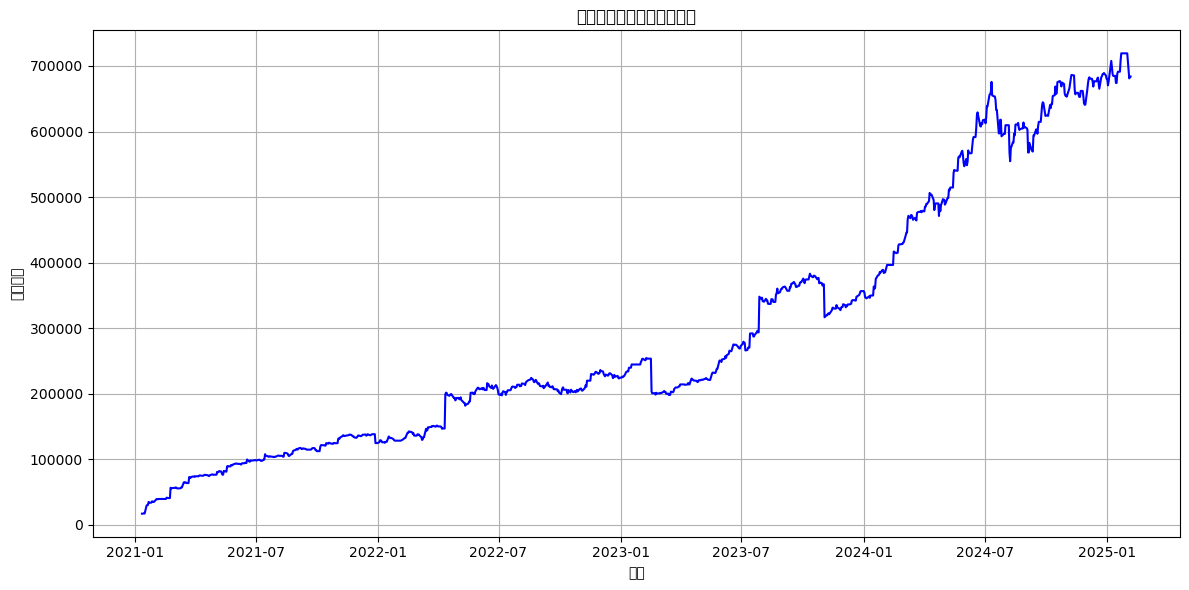

In [75]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# =============================
# 1. 準備交易記錄資料
# -----------------------------
# 假設 df 為交易記錄，至少包含 '股票代號'、'交易日'、'股數'
# 例如：
# data = {
#     '股票代號': ['0050', '2330', '2376', '006208', '2376', '2330'],
#     '交易日': ['2024-01-02', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06'],
#     '股數': [100, 50, 200, 300, -100, -50]  # 假設賣出以負數表示
# }
# df = pd.DataFrame(data)

# 確保交易日為 datetime 格式，並依日期排序
df['交易日'] = pd.to_datetime(df['交易日'])
df = df.sort_values('交易日')

# =============================
# 2. 計算每日各股票累積持有股數
# -----------------------------
# 依據日期及股票代號匯總當日買賣股數
pivot = df.pivot_table(index='交易日', columns='股票代號', values='股數', aggfunc='sum')

# 建立完整日期範圍（以商業日為單位，可根據需求調整）
date_range = pd.date_range(start=df['交易日'].min(), end=pd.Timestamp.today(), freq='B')
# 將 pivot DataFrame 依完整日期範圍補齊（當天無交易以 0 表示）
pivot = pivot.reindex(date_range, fill_value=0)

# 計算累積持有股數（累積加總各日的交易數量）
cum_holdings = pivot.cumsum()

# =============================
# 3. 定義函式抓取每日收盤價
# -----------------------------
def get_daily_price(stock_code, start_date, end_date):
    """
    使用 yfinance 抓取指定股票從 start_date 到 end_date 的每日收盤價
    對於台灣股票，ticker 格式通常為 "股票代號.TW"
    """
    ticker = f"{stock_code}.TW"
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    # 如果資料為空，會回傳空的 DataFrame
    if data.empty:
        raise ValueError(f"無法取得 {ticker} 的資料")
    return data['Close']

# =============================
# 4. 依股票計算每日市值，再彙總組合總市值
# -----------------------------
# 初始化一個 Series 用來儲存每日組合市值
portfolio_value = pd.Series(0, index=date_range)

# 逐一對各股票計算市值：當日持股數 * 當日收盤價
for stock in cum_holdings.columns:
    print(f"處理股票: {stock}")
    try:
        # 設定查詢的日期範圍（可與組合日期範圍一致）
        start_str = date_range[0].strftime('%Y-%m-%d')
        end_str = date_range[-1].strftime('%Y-%m-%d')
        # 取得股票每日收盤價
        price_series = get_daily_price(stock, start_str, end_str)
        # 依照完整日期範圍重新索引，並以前一交易日收盤價填補缺值（例如假日）
        price_series = price_series.reindex(date_range).ffill()
        # 計算該股票每日市值 = 持有股數 * 收盤價
        stock_value = cum_holdings[stock] * price_series
        # 加入組合總市值
        portfolio_value += stock_value
    except Exception as e:
        print(f"取得股票 {stock} 價格資料時發生錯誤: {e}")

# 若組合市值仍有缺失值，補齊它們
portfolio_value = portfolio_value.fillna(method='ffill').fillna(method='bfill')


# =============================
# 5. 繪製折線圖（無斷點）
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value.index, portfolio_value.values, linestyle='-', color='blue')  
plt.xlabel('日期')
plt.ylabel('組合市值')
plt.title('每日股票組合總市值走勢圖')
plt.grid(True)
plt.tight_layout()
plt.show()


  交易日         交易別 股票代號  股票名稱  股數     單價     進帳/出帳  Unnamed: 7 XIRR     總成本(賣-買)  總價值(現值+配息)  總獲利(%)     總配息    
0  2021/01/11  買   0050  NaN  130.0  131.9 -17147 NaN          23.39% -448141.0  719607.0    60.576024  28842.0
1  2021/01/15  買   2330   台積   20.0  612.0 -12240 NaN             NaN       NaN       NaN          NaN      NaN
2  2021/01/20  買   2376   技嘉   40.0   79.5  -3180 NaN             NaN       NaN       NaN          NaN      NaN
3  2021/01/25  買   2330   台積    5.0  644.0  -3220 NaN             NaN       NaN       NaN          NaN      NaN
4  2021/01/29  買   2330  NaN    5.0  603.0  -3015 NaN             NaN       NaN       NaN          NaN      NaN
淨持股：
股票代號
0050         0.0
0056         0.0
006208    4686.0
00631L     554.0
00646        0.0
2330         0.0
2376       100.0
2884         0.0
Name: 股數, dtype: float64
股票 006208: 持股 4686.0, 當前價格 115.45
股票 00631L: 持股 554.0, 當前價格 239.65
股票 2376: 持股 100.0, 當前價格 251.5
目前投資組合市值：698914.80
XIRR: 22.54%


c:\Users\Tim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25240 (\N{CJK UNIFIED IDEOGRAPH-6298}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


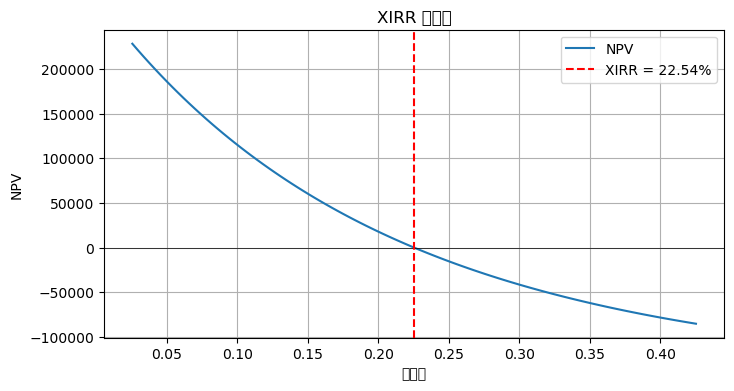

In [83]:
import numpy as np
import pandas as pd
from scipy.optimize import newton
import twstock
from datetime import datetime
import matplotlib.pyplot as plt

# -----------------------------
# 1. 讀取資料與基本處理
# -----------------------------
# 假設 CSV 檔名為 'tw_train.csv'
df = pd.read_csv('tw_train.csv')

# 檢查資料（可印出前幾列）
print(df.head())

# 轉換「交易日」為 datetime 格式，這裡假設格式為 'YYYY/MM/DD'
df['交易日'] = pd.to_datetime(df['交易日'], format='%Y/%m/%d')

# 將「進帳/出帳」欄位轉成數字（可能含有負號）
df['進帳/出帳'] = pd.to_numeric(df['進帳/出帳'], errors='coerce')

# -----------------------------
# 2. 組成現金流序列
# -----------------------------
# 每筆交易視為一筆現金流 (日期, 金額)
cashflows = list(df[['交易日', '進帳/出帳']].itertuples(index=False, name=None))
# 範例：
# [(Timestamp('2021-01-11 00:00:00'), -17147.0), (Timestamp('2021-01-15 00:00:00'), -12240.0), ...]

# -----------------------------
# 3. 計算目前投資組合市值（未平倉部位）
# -----------------------------
# 假設每筆交易皆記錄在 "股數" 欄位（買進為正、賣出為負），計算每檔股票的淨持股
net_holdings = df.groupby('股票代號')['股數'].sum()
print("淨持股：")
print(net_holdings)

def get_current_price(stock_code):
    """
    嘗試利用 twstock.realtime 取得即時價格，若失敗則以 twstock.Stock().price 作為備用。
    """
    try:
        realtime_data = twstock.realtime.get(stock_code)
        if realtime_data.get('success'):
            price_str = realtime_data['realtime']['latest_trade_price']
            return float(price_str)
        else:
            raise ValueError("Realtime 取得資料失敗")
    except Exception as e:
        print(f"取得 {stock_code} 即時價格失敗，改用 twstock.Stock()，錯誤：{e}")
        # twstock.Stock(stock_code).price 取得的是收盤價（可能不是即時價格）
        stock = twstock.Stock(stock_code)
        return stock.price

# 計算所有股票目前市值（淨持股 * 當前價格），累加即為投資組合現值
portfolio_value = 0
for stock_code, shares in net_holdings.items():
    # 只處理持股不為 0 的股票
    if shares != 0:
        price = get_current_price(stock_code)
        print(f"股票 {stock_code}: 持股 {shares}, 當前價格 {price}")
        portfolio_value += shares * price

print(f"目前投資組合市值：{portfolio_value:.2f}")

# 將目前市值當作最後一筆現金流，日期以今日（normalize 為 00:00）
today = pd.Timestamp.today().normalize()
cashflows.append((today, portfolio_value))

# -----------------------------
# 4. 定義 XNPV 與 XIRR 計算函式
# -----------------------------
def xnpv(rate, cashflows):
    """
    計算不規則現金流的淨現值 (NPV)
    :param rate: 折現率 (例如 0.1 代表 10%)
    :param cashflows: [(date, amount), ...]，其中 date 為 pd.Timestamp
    :return: NPV
    """
    # 以最早的現金流日期為基準
    t0 = min(date for date, _ in cashflows)
    return sum(cf / ((1 + rate) ** ((date - t0).days / 365.0))
               for date, cf in cashflows)

def xirr(cashflows, guess=0.1):
    """
    利用牛頓法計算 XIRR，使得 xnpv(rate, cashflows) = 0
    :param cashflows: [(date, amount), ...]
    :param guess: 初始猜測值
    :return: XIRR (折現率)
    """
    return newton(lambda r: xnpv(r, cashflows), guess)

# -----------------------------
# 5. 計算 XIRR
# -----------------------------
irr = xirr(cashflows)
print(f"XIRR: {irr:.2%}")

# -----------------------------
# 6. (可選) 繪製現金流折現值隨折現率變化圖示，以驗證解的合理性
# -----------------------------
rates = np.linspace(irr - 0.2, irr + 0.2, 100)
npv_values = [xnpv(r, cashflows) for r in rates]

plt.figure(figsize=(8, 4))
plt.plot(rates, npv_values, label='NPV')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(irr, color='red', linestyle='--', label=f'XIRR = {irr:.2%}')
plt.xlabel('折現率')
plt.ylabel('NPV')
plt.title('XIRR 求解圖')
plt.legend()
plt.grid(True)
plt.show()


處理股票: 0050
處理股票: 0056
處理股票: 006208
處理股票: 00631L
處理股票: 00646
處理股票: 2330
處理股票: 2376
處理股票: 2884


C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\4044588421.py:66: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  portfolio_value = portfolio_value.fillna(method='ffill').fillna(method='bfill')
C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\4044588421.py:75: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\4044588421.py:75: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  plt.tight_layout()
C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\4044588421.py:75: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from current font.
  plt.tight_layout()
C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\4044588421.py:75: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  plt.tight_layout()
C:\Users\Tim\AppData\Local\Temp\ipyk

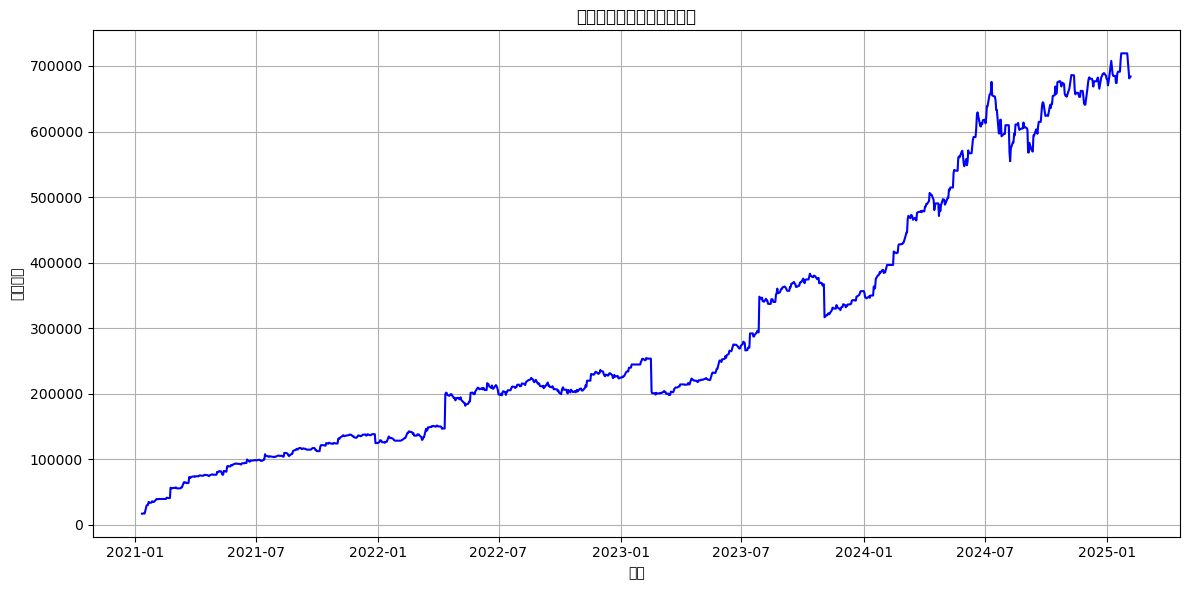

每日報酬率樣本：
2021-01-12    0.000000
2021-01-13    0.024224
2021-01-14   -0.009239
2021-01-15    0.000000
2021-01-18    0.699251
Freq: B, dtype: float64
年化夏普值 (Annualized Sharpe Ratio): 1.87
最大回撤 (Maximum Drawdown): 22.21%
XIRR: 22.50%


In [92]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import newton
from datetime import datetime

# =============================
# 1. 準備交易記錄資料
# -----------------------------
# 假設您的 CSV 資料包含至少 '股票代號'、'交易日'、'股數' 與 '進帳/出帳'
df = pd.read_csv('tw_train.csv')

# 將「交易日」轉換為 datetime 格式（假設格式為 'YYYY/MM/DD' 或其他格式）
df['交易日'] = pd.to_datetime(df['交易日'])
df = df.sort_values('交易日')

# =============================
# 2. 計算每日各股票累積持有股數
# -----------------------------
# 依據「交易日」與「股票代號」彙整當日買賣股數
pivot = df.pivot_table(index='交易日', columns='股票代號', values='股數', aggfunc='sum')

# 建立完整日期範圍（以商業日為單位）
date_range = pd.date_range(start=df['交易日'].min(), end=pd.Timestamp.today(), freq='B')
# 補齊 pivot DataFrame，當天無交易則以 0 表示
pivot = pivot.reindex(date_range, fill_value=0)
# 計算累積持有股數（每日累積加總）
cum_holdings = pivot.cumsum()

# =============================
# 3. 定義函式抓取每日收盤價（僅使用前向填補）
# -----------------------------
def get_daily_price(stock_code, start_date, end_date):
    """
    使用 yfinance 抓取指定股票從 start_date 到 end_date 的每日收盤價。
    台灣股票的 ticker 格式通常為 "股票代號.TW"
    """
    ticker = f"{stock_code}.TW"
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if data.empty:
        raise ValueError(f"無法取得 {ticker} 的資料")
    return data['Close']

# =============================
# 4. 計算每日組合市值
# -----------------------------
# 初始化一個 Series 用來儲存每日組合市值
portfolio_value = pd.Series(0, index=date_range)

# 逐一對各股票計算每日市值：當日持股數 * 當日收盤價
for stock in cum_holdings.columns:
    print(f"處理股票: {stock}")
    try:
        start_str = date_range[0].strftime('%Y-%m-%d')
        end_str = date_range[-1].strftime('%Y-%m-%d')
        price_series = get_daily_price(stock, start_str, end_str)
        # 依據完整日期範圍重新索引，僅用前向填補缺失值
        price_series = price_series.reindex(date_range).ffill()
        stock_value = cum_holdings[stock] * price_series
        portfolio_value += stock_value
    except Exception as e:
        print(f"取得股票 {stock} 價格資料時發生錯誤: {e}")

# 補齊組合市值序列（先用前向填補，再用後向填補以確保首尾無缺失）
portfolio_value = portfolio_value.fillna(method='ffill').fillna(method='bfill')

# 繪製組合市值走勢圖
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value.index, portfolio_value.values, linestyle='-', color='blue')
plt.xlabel('日期')
plt.ylabel('組合市值')
plt.title('每日股票組合總市值走勢圖')
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================
# 5. 計算績效指標：年化夏普值、最大回撤
# -----------------------------
# 5.1 每日報酬率（百分比變化）
daily_returns = portfolio_value.pct_change().dropna()
print("每日報酬率樣本：")
print(daily_returns.head())

# 5.2 設定無風險利率（年化），例如 1% 即 0.01，您可根據實際情況修改
risk_free_rate = 0.01  # 年化無風險利率
daily_risk_free_rate = risk_free_rate / 252

# 5.3 年化夏普值計算：考慮無風險利率
if daily_returns.empty:
    print("無足夠每日報酬率資料，無法計算夏普值。")
    annual_sharpe = np.nan
else:
    mean_daily_return = daily_returns.mean()
    std_daily_return = daily_returns.std()
    if std_daily_return == 0:
        print("每日報酬率標準差為 0，無法計算夏普值。")
        annual_sharpe = np.nan
    else:
        # (mean_daily_return - daily_risk_free_rate) 是扣除每日無風險利率後的超額報酬
        annual_sharpe = ((mean_daily_return - daily_risk_free_rate) / std_daily_return) * np.sqrt(252)
print("年化夏普值 (Annualized Sharpe Ratio): {:.2f}".format(annual_sharpe))

# 5.4 最大回撤計算
running_max = portfolio_value.cummax()
drawdown = (portfolio_value - running_max) / running_max
max_drawdown = drawdown.min()  # 此值為負值，代表最大跌幅
print("最大回撤 (Maximum Drawdown): {:.2%}".format(abs(max_drawdown)))

# =============================
# 6. 計算 XIRR (內部報酬率)
# -----------------------------
# 6.1 建立現金流序列：將每筆交易的「進帳/出帳」視為現金流 (日期, 金額)
cashflows = list(df[['交易日', '進帳/出帳']].itertuples(index=False, name=None))

# 6.2 定義函式，利用 yfinance 取得最新價格
def get_current_price_yf(stock_code):
    """
    使用 yfinance 取得指定股票的即時價格，
    若無即時價格，則取得最近一個交易日的收盤價；
    如果抓到的價格為 0，則印出錯誤訊息並回傳 None。
    """
    ticker = f"{stock_code}.TW"
    try:
        t = yf.Ticker(ticker)
        info = t.info
        price = info.get('regularMarketPrice', None)
        if price is None:
            data = yf.download(ticker, period="1d", progress=False)
            if data.empty:
                print(f"警告: {ticker} 無法取得任何價格資料。")
                return None
            price = data['Close'].iloc[-1]
        if price == 0:
            print(f"錯誤: {ticker} 抓到的價格為 0，請檢查資料來源！")
            return None
        return price
    except Exception as e:
        print(f"取得 {ticker} 即時價格失敗，錯誤：{e}")
        return None

# 6.3 根據所有股票淨持股計算目前投資組合現值
net_holdings = df.groupby('股票代號')['股數'].sum()
portfolio_snapshot = 0
for stock, shares in net_holdings.items():
    if shares != 0:
        price = get_current_price_yf(stock)
        if price is not None:
            portfolio_snapshot += shares * price

# 使用今日（normalize 到 00:00）作為現金流日期
today = pd.Timestamp.today().normalize()
cashflows.append((today, portfolio_snapshot))

# 6.4 定義 XNPV 與 XIRR 函式
def xnpv(rate, cashflows):
    """
    計算不規則現金流的淨現值 (NPV)
    :param rate: 折現率（例如 0.1 代表 10%）
    :param cashflows: [(date, amount), ...]，其中 date 為 pd.Timestamp
    :return: NPV
    """
    t0 = min(date for date, _ in cashflows)
    return sum(cf / ((1 + rate) ** ((date - t0).days / 365.0))
               for date, cf in cashflows)

def xirr(cashflows, guess=0.1):
    """
    利用牛頓法計算 XIRR，使 xnpv(rate, cashflows) = 0
    :param cashflows: [(date, amount), ...]
    :param guess: 初始猜測值（預設 0.1，即 10%）
    :return: XIRR（折現率）
    """
    return newton(lambda r: xnpv(r, cashflows), guess)

irr = xirr(cashflows)
print("XIRR: {:.2%}".format(irr))


處理股票: 0050
處理股票: 0056
處理股票: 006208
處理股票: 00631L
處理股票: 00646
處理股票: 2330
處理股票: 2376
處理股票: 2884


C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\3630063784.py:70: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  portfolio_value = portfolio_value.fillna(method='ffill').fillna(method='bfill')


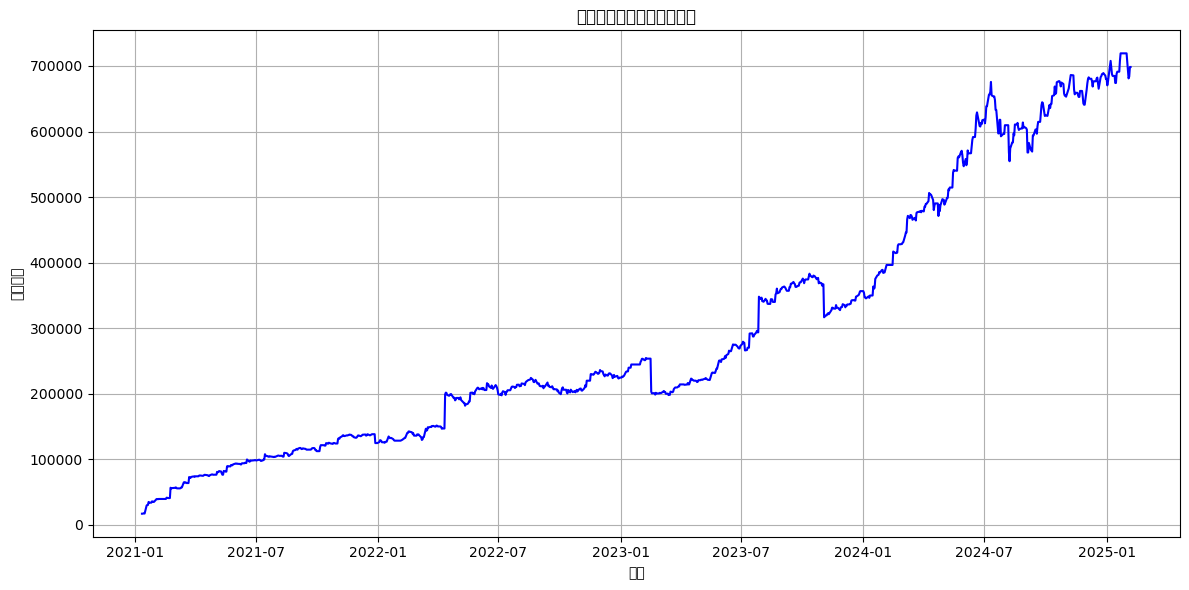

TWR 每日報酬率樣本：
2021-01-12    0.000000
2021-01-13    0.024224
2021-01-14   -0.009239
2021-01-15    0.702379
2021-01-18    0.699251
dtype: float64
年化 TWR 夏普值 (Annualized Sharpe Ratio based on TWR): 2.50
最大回撤 (Maximum Drawdown): 22.21%
XIRR: 22.48%


In [100]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import newton
from datetime import datetime

import warnings
warnings.filterwarnings("ignore", message="Glyph.*missing from current font")

# =============================
# 1. 準備交易記錄資料
# -----------------------------
# 讀取包含至少 '股票代號'、'交易日'、'股數' 與 '進帳/出帳' 的 CSV 資料
df = pd.read_csv('tw_train.csv')

# 轉換「交易日」為 datetime 格式（請依實際格式修改）
df['交易日'] = pd.to_datetime(df['交易日'])
df = df.sort_values('交易日')

# =============================
# 2. 計算每日各股票累積持有股數
# -----------------------------
# 依據「交易日」與「股票代號」彙整當日買賣股數
pivot = df.pivot_table(index='交易日', columns='股票代號', values='股數', aggfunc='sum')

# 建立完整日期範圍（以商業日為單位）
date_range = pd.date_range(start=df['交易日'].min(), end=pd.Timestamp.today(), freq='B')
# 補齊 pivot DataFrame，當天無交易則以 0 表示
pivot = pivot.reindex(date_range, fill_value=0)

# 計算累積持有股數（每日累積加總）
cum_holdings = pivot.cumsum()

# =============================
# 3. 定義函式抓取每日收盤價（僅使用前向填補）
# -----------------------------
def get_daily_price(stock_code, start_date, end_date):
    """
    使用 yfinance 抓取指定股票從 start_date 到 end_date 的每日收盤價。
    對於台灣股票，ticker 格式通常為 "股票代號.TW"
    """
    ticker = f"{stock_code}.TW"
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if data.empty:
        raise ValueError(f"無法取得 {ticker} 的資料")
    return data['Close']

# =============================
# 4. 計算每日組合市值
# -----------------------------
# 初始化一個 Series 用來儲存每日組合市值，索引為完整日期範圍
portfolio_value = pd.Series(0, index=date_range)

# 逐一對各股票計算每日市值：當日累積持股數 * 當日收盤價
for stock in cum_holdings.columns:
    print(f"處理股票: {stock}")
    try:
        start_str = date_range[0].strftime('%Y-%m-%d')
        end_str = date_range[-1].strftime('%Y-%m-%d')
        price_series = get_daily_price(stock, start_str, end_str)
        # 根據完整日期範圍重新索引，僅用前向填補缺失值
        price_series = price_series.reindex(date_range).ffill()
        stock_value = cum_holdings[stock] * price_series
        portfolio_value += stock_value
    except Exception as e:
        print(f"取得股票 {stock} 價格資料時發生錯誤: {e}")

# 補齊組合市值序列（先用前向填補，再用後向填補以確保首尾無缺失）
portfolio_value = portfolio_value.fillna(method='ffill').fillna(method='bfill')

# 繪製組合市值走勢圖
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value.index, portfolio_value.values, linestyle='-', color='blue')
plt.xlabel('日期')
plt.ylabel('組合市值')
plt.title('每日股票組合總市值走勢圖')
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================
# 5. 計算績效指標：TWR 夏普值與最大回撤
# -----------------------------
# 5.1 取得每日現金流：以 CSV 中「進帳/出帳」進行加總
# 這代表當天因外部現金流入（正值）或流出（負值）的金額
cf_series = df.groupby('交易日')['進帳/出帳'].sum()
cf_series = cf_series.reindex(date_range, fill_value=0)

# 5.2 計算每日 TWR 回報
# 公式：若 t 為某天，則
#   R_t = (V_t - CF_t) / V_{t-1} - 1
# 注意：若前一日市值為 0，則無法計算，該天將被跳過
twr_returns = []
twr_dates = []
for i in range(1, len(portfolio_value)):
    V_prev = portfolio_value.iloc[i-1]
    V_today = portfolio_value.iloc[i]
    CF_today = cf_series.iloc[i]  # 當天的外部現金流
    # 若前一天市值為 0，跳過（或可考慮其他處理方式）
    if V_prev == 0:
        continue
    # TWR 回報排除了當天現金流的影響
    r = (V_today - CF_today) / V_prev - 1
    twr_returns.append(r)
    twr_dates.append(portfolio_value.index[i])

# 建立 TWR 日報酬率 Series
twr_returns_series = pd.Series(twr_returns, index=twr_dates)
print("TWR 每日報酬率樣本：")
print(twr_returns_series.head())

# 5.3 設定無風險利率（年化），例如 1%（0.01），根據需求可調整
risk_free_rate = 0.02  # 年化無風險利率
daily_risk_free_rate = risk_free_rate / 252

# 5.4 計算 TWR 基礎下的年化夏普值
if twr_returns_series.empty:
    print("無足夠 TWR 每日報酬率資料，無法計算夏普值。")
    annual_sharpe = np.nan
else:
    mean_daily_return = twr_returns_series.mean()
    std_daily_return = twr_returns_series.std()
    if std_daily_return == 0:
        print("TWR 每日報酬率標準差為 0，無法計算夏普值。")
        annual_sharpe = np.nan
    else:
        # 扣除每日無風險利率後的超額報酬，再年化
        annual_sharpe = ((mean_daily_return - daily_risk_free_rate) / std_daily_return) * np.sqrt(252)
print("年化 TWR 夏普值 (Annualized Sharpe Ratio based on TWR): {:.2f}".format(annual_sharpe))

# 5.5 最大回撤計算（使用原始組合市值序列）
running_max = portfolio_value.cummax()
drawdown = (portfolio_value - running_max) / running_max
max_drawdown = drawdown.min()  # 為負值，代表最大跌幅
print("最大回撤 (Maximum Drawdown): {:.2%}".format(abs(max_drawdown)))

# =============================
# 6. 計算 XIRR (內部報酬率)
# -----------------------------
# 6.1 建立現金流序列：將每筆交易的「進帳/出帳」視為現金流 (日期, 金額)
cashflows = list(df[['交易日', '進帳/出帳']].itertuples(index=False, name=None))

# 6.2 定義函式，利用 yfinance 取得最新價格
def get_current_price_yf(stock_code):
    """
    使用 yfinance 取得指定股票的即時價格，
    若無即時價格，則取得最近一個交易日的收盤價；
    如果抓到的價格為 0，則印出錯誤訊息並回傳 None。
    """
    ticker = f"{stock_code}.TW"
    try:
        t = yf.Ticker(ticker)
        info = t.info
        price = info.get('regularMarketPrice', None)
        if price is None:
            data = yf.download(ticker, period="1d", progress=False)
            if data.empty:
                print(f"警告: {ticker} 無法取得任何價格資料。")
                return None
            price = data['Close'].iloc[-1]
        if price == 0:
            print(f"錯誤: {ticker} 抓到的價格為 0，請檢查資料來源！")
            return None
        return price
    except Exception as e:
        print(f"取得 {ticker} 即時價格失敗，錯誤：{e}")
        return None

# 6.3 根據所有股票淨持股計算目前投資組合現值
net_holdings = df.groupby('股票代號')['股數'].sum()
portfolio_snapshot = 0
for stock, shares in net_holdings.items():
    if shares != 0:
        price = get_current_price_yf(stock)
        if price is not None:
            portfolio_snapshot += shares * price

# 6.4 將最新組合市值作為最後一筆現金流，日期取今日（normalize 到 00:00）
today = pd.Timestamp.today().normalize()
cashflows.append((today, portfolio_snapshot))

# 6.5 定義 XNPV 與 XIRR 函式
def xnpv(rate, cashflows):
    """
    計算不規則現金流的淨現值 (NPV)
    :param rate: 折現率（例如 0.1 代表 10%）
    :param cashflows: [(date, amount), ...]，其中 date 為 pd.Timestamp
    :return: NPV
    """
    t0 = min(date for date, _ in cashflows)
    return sum(cf / ((1 + rate) ** ((date - t0).days / 365.0))
               for date, cf in cashflows)

def xirr(cashflows, guess=0.1):
    """
    利用牛頓法計算 XIRR，使 xnpv(rate, cashflows) = 0
    :param cashflows: [(date, amount), ...]
    :param guess: 初始猜測值（預設 0.1，即 10%）
    :return: XIRR（折現率）
    """
    return newton(lambda r: xnpv(r, cashflows), guess)

irr = xirr(cashflows)
print("XIRR: {:.2%}".format(irr))


處理股票: 0050
處理股票: 0056
處理股票: 006208
處理股票: 00631L
處理股票: 00646
處理股票: 2330
處理股票: 2376
處理股票: 2884


C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\782772441.py:69: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  portfolio_value = portfolio_value.fillna(method='ffill').fillna(method='bfill')


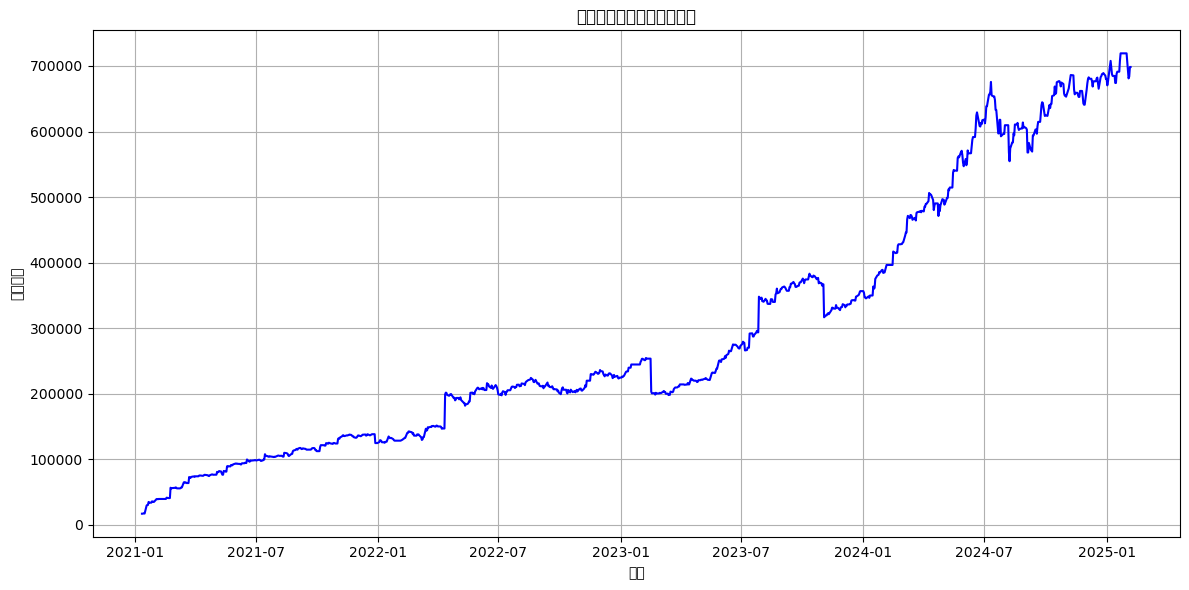

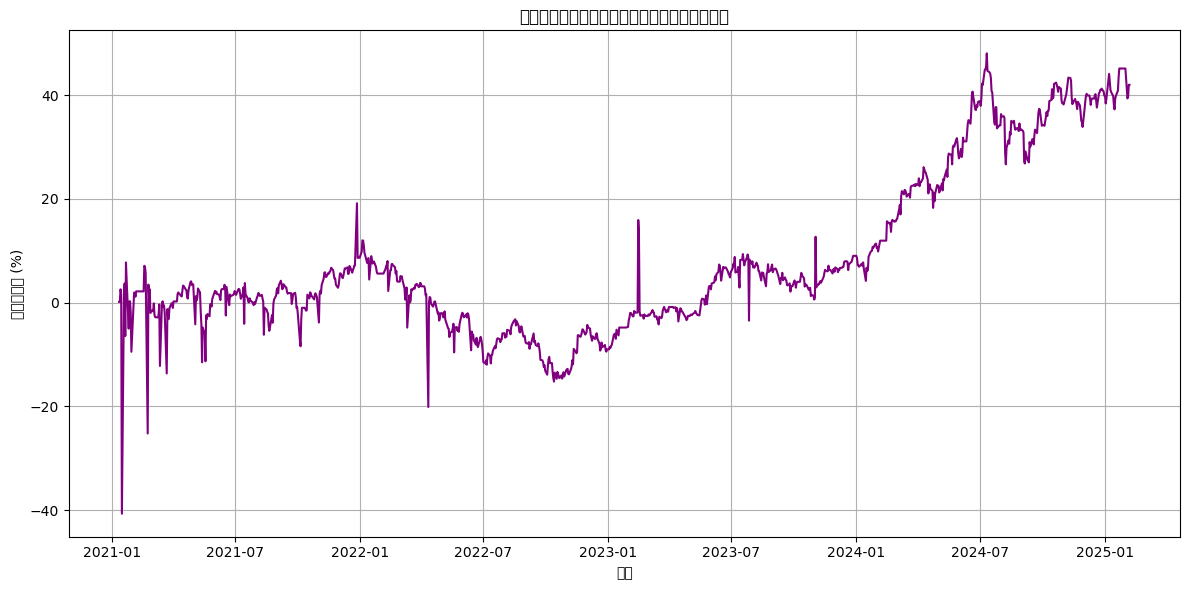

In [99]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import newton

import warnings
warnings.filterwarnings("ignore", message="Glyph.*missing from current font")

# =============================
# 1. 讀取並處理交易記錄資料
# -----------------------------
# 假設 CSV 檔案包含欄位： '股票代號', '交易日', '股數', '進帳/出帳'
df = pd.read_csv('tw_train.csv')

# 將「交易日」轉換為 datetime 格式（請根據實際格式修改）
df['交易日'] = pd.to_datetime(df['交易日'])
df = df.sort_values('交易日')

# =============================
# 2. 計算每日各股票累積持有股數
# -----------------------------
# 利用 pivot_table 依據「交易日」及「股票代號」彙整當日買賣股數
pivot = df.pivot_table(index='交易日', columns='股票代號', values='股數', aggfunc='sum')

# 建立完整日期範圍（以商業日為單位），從第一筆交易日到今天
date_range = pd.date_range(start=df['交易日'].min(), end=pd.Timestamp.today(), freq='B')
pivot = pivot.reindex(date_range, fill_value=0)

# 計算累積持股數（每日累積加總）
cum_holdings = pivot.cumsum()

# =============================
# 3. 定義函式：利用 yfinance 取得每日收盤價（僅使用前向填補）
# -----------------------------
def get_daily_price(stock_code, start_date, end_date):
    """
    使用 yfinance 抓取指定股票從 start_date 到 end_date 的每日收盤價。
    台灣股票的 ticker 格式通常為 "股票代號.TW"
    """
    ticker = f"{stock_code}.TW"
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if data.empty:
        raise ValueError(f"無法取得 {ticker} 的資料")
    return data['Close']

# =============================
# 4. 計算每日組合市值
# -----------------------------
# 初始化一個 Series 用來儲存每日組合市值，索引為完整日期範圍
portfolio_value = pd.Series(0, index=date_range)

# 對每支股票計算市值：當日累積持股數 * 當日收盤價
for stock in cum_holdings.columns:
    print(f"處理股票: {stock}")
    try:
        start_str = date_range[0].strftime('%Y-%m-%d')
        end_str = date_range[-1].strftime('%Y-%m-%d')
        price_series = get_daily_price(stock, start_str, end_str)
        # 依據完整日期範圍重新索引，僅使用前向填補 (ffill) 補齊缺失值
        price_series = price_series.reindex(date_range).ffill()
        stock_value = cum_holdings[stock] * price_series
        portfolio_value += stock_value
    except Exception as e:
        print(f"取得股票 {stock} 價格資料時發生錯誤: {e}")

# 補齊組合市值序列（先用前向填補，再用後向填補確保首尾無缺失值）
portfolio_value = portfolio_value.fillna(method='ffill').fillna(method='bfill')

# 繪製組合市值走勢圖（供參考）
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value.index, portfolio_value.values, linestyle='-', color='blue')
plt.xlabel('日期')
plt.ylabel('組合市值')
plt.title('每日股票組合總市值走勢圖')
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================
# 5. 計算累積入金與已實現現金，進而計算「總資產獲利%」走勢圖
# -----------------------------
# 5.1 累積入金：只取買入交易（進帳/出帳 < 0），轉為正數後累加
#    例如：買入記錄 -1000，則投入資金為 1000
buy_flows = -df[df['進帳/出帳'] < 0].groupby('交易日')['進帳/出帳'].sum()
cumulative_investment = buy_flows.reindex(date_range, fill_value=0).cumsum()

# 5.2 已實現現金：取賣出交易（進帳/出帳 > 0），累加
sell_flows = df[df['進帳/出帳'] > 0].groupby('交易日')['進帳/出帳'].sum()
realized_cash = sell_flows.reindex(date_range, fill_value=0).cumsum()

# 5.3 計算總資產價值：當日組合市值 + 已實現現金
total_wealth = portfolio_value + realized_cash

# 5.4 計算以累積入金為基礎的績效比例與獲利%
# 若累積入金為 0，則該日績效比例為 NaN
performance_ratio = pd.Series(np.nan, index=date_range)
mask = cumulative_investment > 0
performance_ratio[mask] = total_wealth[mask] / cumulative_investment[mask]
profit_pct = (performance_ratio - 1) * 100

# 繪製總資產獲利% 走勢圖（以累積入金為基礎）
plt.figure(figsize=(12, 6))
plt.plot(profit_pct.index, profit_pct.values, linestyle='-', color='purple')
plt.xlabel('日期')
plt.ylabel('總資產獲利 (%)')
plt.title('總資產獲利百分比走勢圖（以累積入金為基礎）')
plt.grid(True)
plt.tight_layout()
plt.show()


處理股票: 0050
處理股票: 0056
處理股票: 006208
處理股票: 00631L
處理股票: 00646
處理股票: 2330
處理股票: 2376
處理股票: 2884


C:\Users\Tim\AppData\Local\Temp\ipykernel_2400\2193648816.py:82: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  portfolio_value = portfolio_value.fillna(method='ffill').fillna(method='bfill')


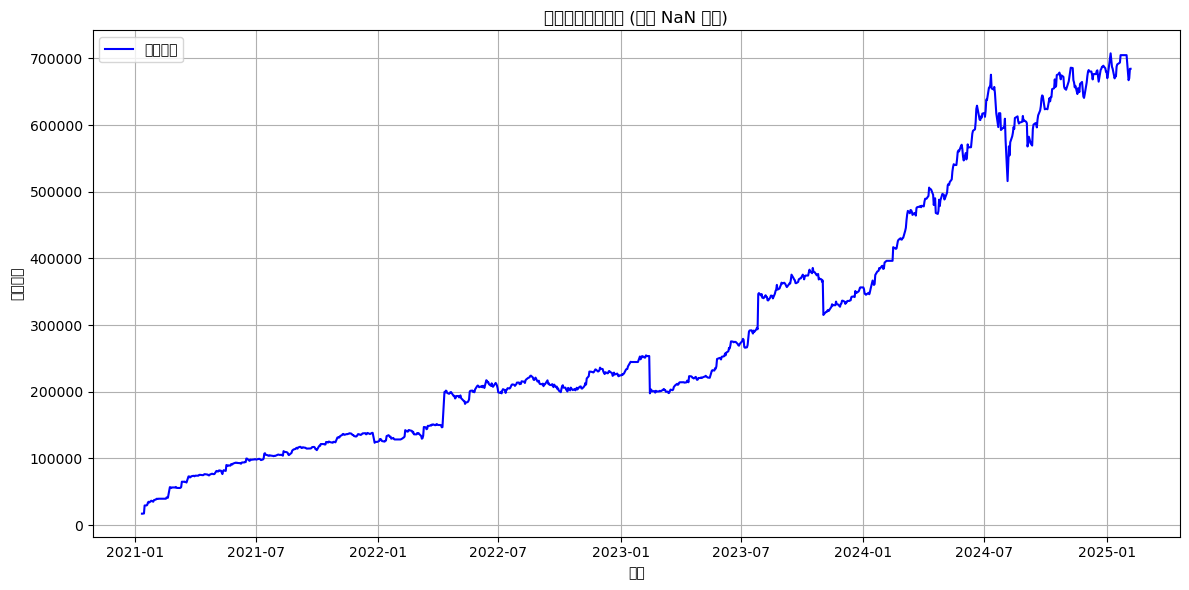

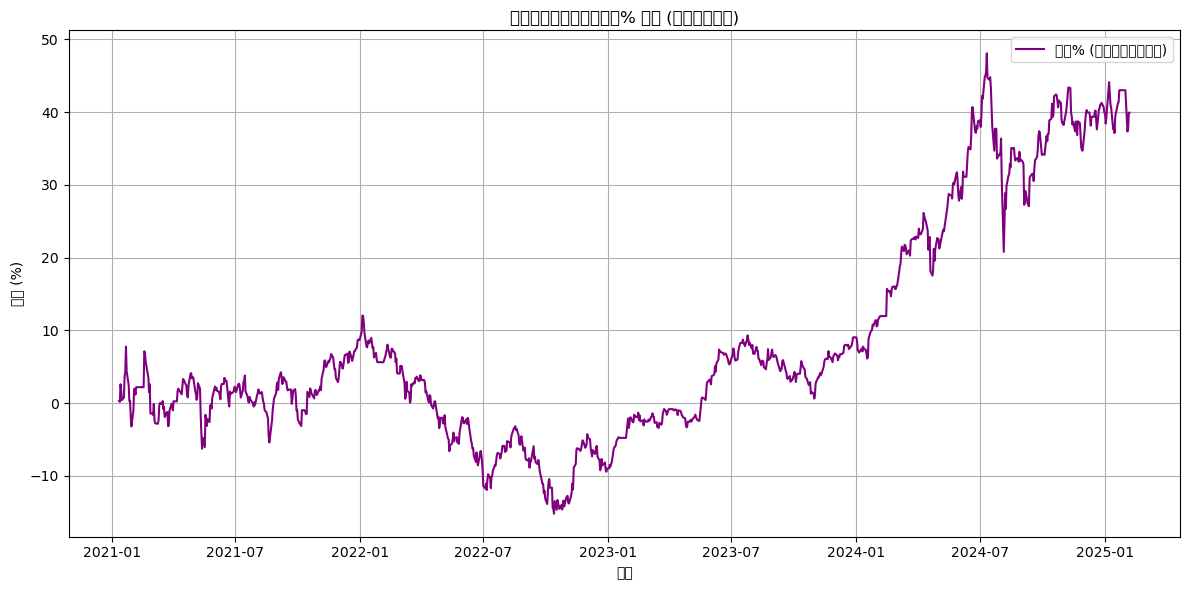

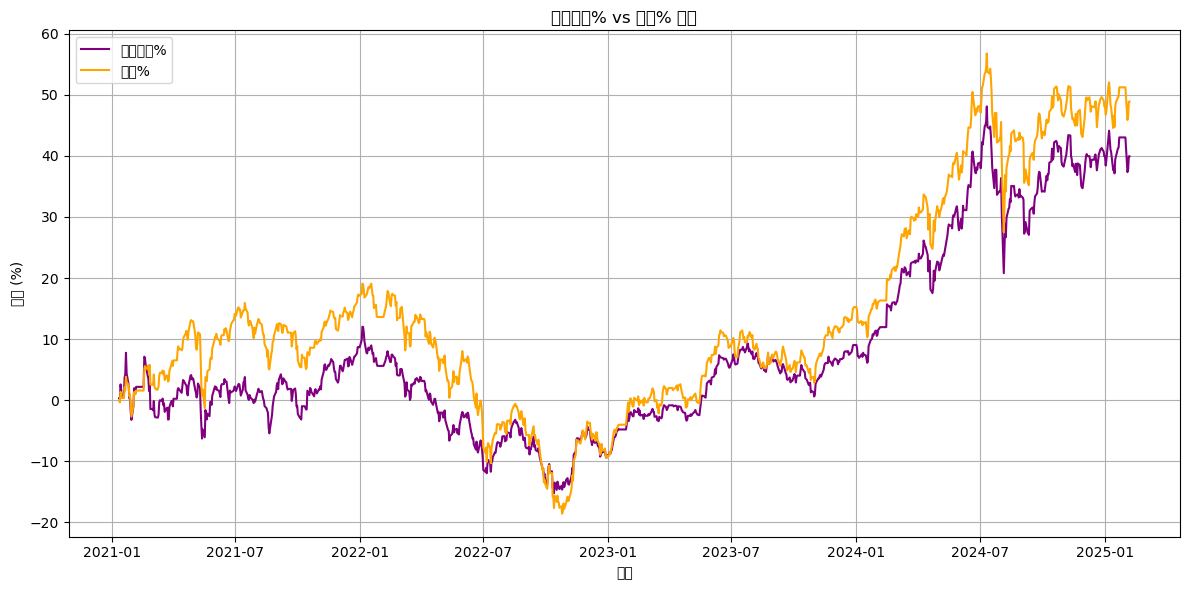

=== 累積持股數 (cum_holdings) ===

> 2023-02-13 :
股票代號
0050       150.0
0056         0.0
006208    2108.0
00631L       0.0
00646     1920.0
2330         0.0
2376       100.0
2884       140.0
Name: 2023-02-13 00:00:00, dtype: float64

> 2023-02-14 :
股票代號
0050       150.0
0056         0.0
006208    2108.0
00631L       0.0
00646      420.0
2330         0.0
2376       100.0
2884       140.0
Name: 2023-02-14 00:00:00, dtype: float64

> 2023-02-15 :
股票代號
0050       150.0
0056         0.0
006208    2208.0
00631L       0.0
00646      420.0
2330         0.0
2376       100.0
2884       140.0
Name: 2023-02-15 00:00:00, dtype: float64

> 2023-02-16 :
股票代號
0050       150.0
0056         0.0
006208    2208.0
00631L       0.0
00646      420.0
2330         0.0
2376       100.0
2884       140.0
Name: 2023-02-16 00:00:00, dtype: float64

=== 組合市值 (portfolio_value) ===

2023-02-13 的組合市值： 253658.0006942749
2023-02-14 的組合市值： 197739.95680999756
2023-02-15 的組合市值： 201244.33193969727
2023-02-16 的組合市值： 203437.7878417

In [108]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import newton

# =============================
# 1. 讀取並處理交易記錄資料
# -----------------------------
# 假設 CSV 檔案包含：'交易日','交易別','股票代號','股數','進帳/出帳'
df = pd.read_csv('tw_train.csv')

# (a) 將「交易日」轉換為 datetime 格式（依您的格式，例如 '%Y/%m/%d'）
df['交易日'] = pd.to_datetime(df['交易日'])
# (b) 日期排序
df = df.sort_values('交易日')

# (c) 修正股數方向：如果「交易別」= '賣'，則股數轉為負值
def fix_share_sign(row):
    if (row['交易別'] == '賣') and (row['股數'] > 0):
        row['股數'] = -row['股數']
    return row

df = df.apply(fix_share_sign, axis=1)

# =============================
# 2. 建立每日累積持股數 (cum_holdings)
# -----------------------------
# 2.1 pivot_table：index='交易日', columns='股票代號', values='股數'
pivot = df.pivot_table(
    index='交易日',
    columns='股票代號',
    values='股數',
    aggfunc='sum'
)

# 2.2 建立以商業日(B)為頻率的日期範圍，從最早交易日到今天
start_date = df['交易日'].min()
end_date = pd.Timestamp.today()
date_range = pd.date_range(start=start_date, end=end_date, freq='B')

# 2.3 reindex：補齊無交易日，填 0
pivot = pivot.reindex(date_range, fill_value=0)
# 若仍有 NaN，統一補 0
pivot = pivot.fillna(0)

# 2.4 計算每日累積持股數
cum_holdings = pivot.cumsum()

# =============================
# 3. 定義函式：利用 yfinance 取得每日收盤價
# -----------------------------
def get_daily_price(stock_code, start_date, end_date):
    ticker = f"{stock_code}.TW"
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)
    if data.empty:
        raise ValueError(f"無法取得 {ticker} 的資料")
    return data['Close']

# =============================
# 4. 計算每日組合市值 (portfolio_value)
# -----------------------------
portfolio_value = pd.Series(0, index=date_range)

for stock in cum_holdings.columns:
    print(f"處理股票: {stock}")
    try:
        start_str = date_range[0].strftime('%Y-%m-%d')
        end_str = date_range[-1].strftime('%Y-%m-%d')
        price_series = get_daily_price(stock, start_str, end_str)
        # 重新索引到完整日期，前向填補價格
        price_series = price_series.reindex(date_range).ffill()
        # 計算該股票每日市值：持股數 * 收盤價
        stock_value = cum_holdings[stock] * price_series
        # 累加到組合市值
        portfolio_value += stock_value
    except Exception as e:
        print(f"取得股票 {stock} 價格資料失敗: {e}")

# 若仍有空值，最後再做補齊
portfolio_value = portfolio_value.fillna(method='ffill').fillna(method='bfill')

# (A) 繪製組合市值走勢圖
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value.index, portfolio_value.values, label='組合市值', color='blue')
plt.xlabel('日期')
plt.ylabel('組合市值')
plt.title('每日股票組合市值 (修正 NaN 問題)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =============================
# 5. 計算「獲利%」(以累積入金為基礎)
# -----------------------------
# (a) 累積入金 (買入部分)：只取「進帳/出帳 < 0」的交易，然後取絕對值
#    代表實際投入資金，再依交易日加總，最後做 cumsum()
buy_flows = -df[df['進帳/出帳'] < 0].groupby('交易日')['進帳/出帳'].sum()
buy_flows = buy_flows.reindex(date_range, fill_value=0).cumsum()

# (b) 已實現現金 (賣出部分)：只取「進帳/出帳 > 0」，累加
sell_flows = df[df['進帳/出帳'] > 0].groupby('交易日')['進帳/出帳'].sum()
sell_flows = sell_flows.reindex(date_range, fill_value=0).cumsum()

# (c) 總資產 = 「組合市值」 + 「已實現現金」
total_wealth = portfolio_value + sell_flows

# (d) 計算績效比率 & 獲利 %
#   當累積入金=0 的日子沒意義，設為 NaN
performance_ratio = pd.Series(np.nan, index=date_range)
mask = (buy_flows > 0)
performance_ratio[mask] = total_wealth[mask] / buy_flows[mask]

profit_pct = (performance_ratio - 1) * 100

# (B) 繪製「獲利%」走勢圖
plt.figure(figsize=(12, 6))
plt.plot(profit_pct.index, profit_pct.values, label='獲利% (以累積入金為基礎)', color='purple')
plt.xlabel('日期')
plt.ylabel('獲利 (%)')
plt.title('以累積入金為基礎的獲利% 走勢 (含已實現現金)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# =============================
# 2. 取得大盤指數收盤價 & 計算大盤% 走勢
# -----------------------------
# 這裡以台灣加權指數 ^TWII 為例
ticker = '^TWII'
start_date = date_range[0].strftime('%Y-%m-%d')
end_date = date_range[-1].strftime('%Y-%m-%d')

df_index = yf.download(ticker, start=start_date, end=end_date, progress=False)

if df_index.empty:
    raise ValueError(f"無法取得 {ticker} 大盤資料")

# 取收盤價
index_close = df_index['Close']

# 為了跟您的 date_range 對齊，做 reindex，並用前向填補
index_close = index_close.reindex(date_range).ffill()

# 計算「大盤」自第一天的累積漲跌百分比
# 大盤% = (index_price / 第一筆價格 - 1) * 100
base_price = index_close.iloc[0]
index_pct = (index_close / base_price - 1) * 100

# =============================
# 3. 在同一張圖上繪製「我的獲利%」與「大盤%」走勢
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(profit_pct.index, profit_pct.values, label='我的獲利%', color='purple')
plt.plot(index_pct.index, index_pct.values, label='大盤%', color='orange')

plt.xlabel('日期')
plt.ylabel('報酬 (%)')
plt.title('我的獲利% vs 大盤% 走勢')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# debug
# # 假設您使用的物件是：
# # cum_holdings: DataFrame，index 為日期 (與 date_range 相符)，columns 為股票代號
# # portfolio_value: Series，index 為日期 (與 date_range 相符)，value 為當日組合市值

# check_dates = ['2023-02-13', '2023-02-14', '2023-02-15','2023-02-16']

# print("=== 累積持股數 (cum_holdings) ===\n")
# for d in check_dates:
#     print(f"> {d} :")
#     try:
#         print(cum_holdings.loc[d])
#     except KeyError:
#         print(f"{d} 不在 cum_holdings 的索引中")
#     print()  # 空行分隔

# print("=== 組合市值 (portfolio_value) ===\n")
# for d in check_dates:
#     try:
#         val = portfolio_value.loc[d]
#         print(f"{d} 的組合市值： {val}")
#     except KeyError:
#         print(f"{d} 不在 portfolio_value 的索引中")



In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import twstock
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('tw_train.csv')
df

,交易日,交易別,股票代號,股票名稱,股數,單價,進帳/出帳,Unnamed: 7,XIRR,總成本(賣-買),總價值(現值+配息),總獲利(%),總配息
0,2021/01/11,買,0050,NaN,130.0,131.90,-17147,NaN,23.39%,-448141.0,719607.0,60.576024,28842.0
1,2021/01/15,買,2330,台積,20.0,612.00,-12240,NaN,NaN,NaN,NaN,NaN,NaN
2,2021/01/20,買,2376,技嘉,40.0,79.50,-3180,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/01/25,買,2330,台積,5.0,644.00,-3220,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/01/29,買,2330,NaN,5.0,603.00,-3015,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2024/11/29,買,00631L,NaN,10.0,222.75,-2227,NaN,NaN,NaN,NaN,NaN,NaN
142,2025/01/13,買,006208,NaN,30.0,114.70,-3445,NaN,NaN,NaN,NaN,NaN,NaN
143,2025/01/15,買,006208,NaN,20.0,113.25,-2268,NaN,NaN,NaN,NaN,NaN,NaN
144,2025/01/15,買,00631L,NaN,10.0,232.55,-2328,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import twstock
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('tw_train.csv')
df

# 創建空字典來存放交易次數
stock_counts = {}

# 使用 for 迴圈遍歷每一列資料，計算每個股票的交易次數
for index, row in df.iterrows():
    stock_code = row['股票代號']
    transaction_type = row['交易別']
    count = row['股數']
    date = row['交易日']
    cost = float(row['進帳/出帳'])
    
    # 将字符串转换为 datetime 对象
    # date_object = datetime.strptime(date, '%Y/%m/%d')
    # year = date_object.year
    # month = date_object.month
    # day = date_object.day

    # formatted_date_str = date_object.strftime('%Y-%m-%d')

    # 如果股票代碼為 NaN，略過這一列
    if pd.isna(stock_code) or pd.isna(count):
        continue

    # 如果股票代碼還不在字典中，創建一個新的鍵值對
    if stock_code not in stock_counts:
        stock_counts[stock_code] = {'庫存股': 0,'總成本':0}
    stock_counts[stock_code]['庫存股'] += count
    stock_counts[stock_code]['總成本'] += cost
    #stock_counts[stock_code]['名稱'] = twstock.Stock(stock_code).name

stock_counts

# 將結果轉換為 DataFrame 格式
#stock_counts_df = pd.DataFrame.from_dict(stock_counts)

# 使用 tabulate 函數將 DataFrame 轉換為表格

#print(df)

# 將字典轉換為列表形式

dict = {}
data = []
for stock_code, data_dict in stock_counts.items():
    try:
        stock = twstock.realtime.get(stock_code) 
    except KeyError as e:
        print(f"KeyError for stock {stock_code}: {e} - data might be missing.")
    except Exception as e:
        print(f"Error getting data for {stock_code}: {e}")

    name = stock['info']['name']
    count = data_dict['庫存股']
    cost = -data_dict['總成本']
    val = stock['realtime']['latest_trade_price']
    valTotal = float(val) * float(count)
    gain = valTotal - cost
    gainPer = float(gain) / float(cost) * 100

    dict[stock_code] = { 'valTotal':valTotal}

    #格式化
    valTotal = '{:,}'.format(valTotal)
    cost= '{:,}'.format(cost)
    count = int(count)
    val = "{:.2f}".format(float(val))
    gain = '{:,}'.format(float(gain))
    gainPer = "{:.2f}".format(float(gainPer)) +'%'
    

    data.append([stock_code , name , count , val , valTotal , cost , gain , gainPer])
    #stock = twstock.Stock(stock_code)


# 使用 tabulate 函數將列表轉換為表格
headers = ['股票代碼', '股票名稱', '庫存股','股價','現值總價','總成本','未實現損益','未實現損益(%)']
df = pd.DataFrame(data, columns=headers)

pd.set_option('display.colheader_justify', 'left')  # 設置列標題左對齊
pd.set_option('display.width', 3000)  # 設置顯示寬度，防止換行
# 打印表格

styled_df = df.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('text-align', 'left')]
    }, {
        'selector': 'td',
        'props': [('text-align', 'left')]
    }]
)
styled_df

#stock = twstock.Stock('2330')
#price = stock.fetch(2020,2)
#print(price)

KeyError for stock 00679: 'tlong' - data might be missing.


,股票代碼,股票名稱,庫存股,股價,現值總價,總成本,未實現損益,未實現損益(%)
0,0050,元大台灣50,0,196.80,0.0,-349.0,349.0,-100.00%
1,2330,台積電,0,1110.00,0.0,"-3,004.0","3,004.0",-100.00%
2,2376,技嘉,100,251.50,"25,150.0","8,809.0","16,341.0",185.50%
3,006208,富邦台50,4686,115.45,"540,998.7000000001","364,822.0","176,176.70000000007",48.29%
4,2884,玉山金,0,28.45,0.0,-598.0,598.0,-100.00%
5,0056,元大高股息,0,35.62,0.0,346.0,-346.0,-100.00%
6,00679,元大高股息,0,35.62,0.0,-34.0,34.0,-100.00%
7,00646,元大S&P500,0,61.80,0.0,"-1,194.0","1,194.0",-100.00%
8,00631L,元大台灣50正2,554,239.65,"132,766.1","80,828.0","51,938.100000000006",64.26%


In [77]:
totalVal = 0.0

for index, row in df.iterrows():
    s = row["現值總價"]
    s_clean = s.replace(",", "")
    # 轉換成 float
    f_val = float(s_clean)
    # 直接轉換成 int（注意：這會捨棄小數部分）
    i_val = int(f_val)    
    # row is a pandas Series representing one row
    totalVal += i_val

print("現值總價:" + format(int(totalVal), ",d"))

現值總價:698,914


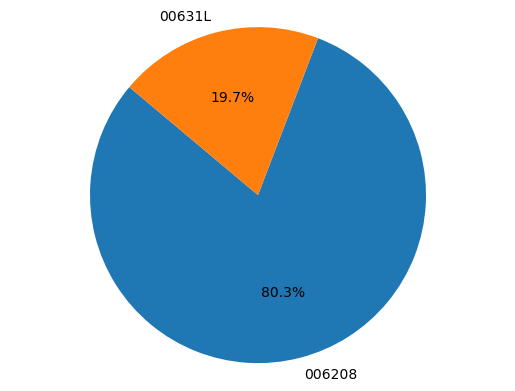

In [23]:
#del dict['2376']#略過技嘉
labels = [key for key, value in dict.items() if value['valTotal'] != 0 and key]
totalVals = [value['valTotal'] for value in dict.values() if value['valTotal'] != 0]
#data
#labels
totalVals

# 指定中文字體
from matplotlib.font_manager import FontProperties
#font = FontProperties(fname='SimHei.ttf', size=14)

# 創建圓餅圖
plt.pie(totalVals, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 使圓餅圖為圓形
plt.title('', fontproperties='Arial')  # 使用中文字體
plt.show()


In [25]:
import twstock
import pandas as pd

# 设定目标股票代码和获取数据的时间范围
target_stock = '0050'
stock = twstock.Stock(target_stock)
target_price = stock.fetch_from(2020, 5)  # 从2020年5月开始获取数据

# 将数据转换为DataFrame，仅包含日期和收盘价
data = []
for price in target_price:
    data.append([price.date.strftime('%Y-%m-%d'), price.close])  # 只包含日期和收盘价

df = pd.DataFrame(data, columns=['Date', 'Close'])

# 保存为CSV文件
f_name = 'tw'+target_stock+'.csv'
df.to_csv(f_name, index=False, encoding='utf-8')

print("数据已成功保存为CSV文件："+f_name)

数据已成功保存为CSV文件：tw0050.csv


In [71]:
import twstock
import pandas as pd

def fetch_and_save_stock_data(stock_code):
    # 获取股票数据
    stock = twstock.Stock(stock_code)
    target_price = stock.fetch_from(2020, 5)  # 从2020年5月开始获取数据
    
    # 将数据转换为DataFrame
    data = []
    for price in target_price:
        data.append([price.date.strftime('%Y-%m-%d'), price.close])
    
    df = pd.DataFrame(data, columns=['Date', 'Close'])
    
    # 保存为CSV文件
    file_name = 'tw' + stock_code + '.csv'
    df.to_csv(file_name, index=False, encoding='utf-8')
    
    print("数据已成功保存为CSV文件：" + file_name)

stock_codes = ['0050', '006208']

for code in stock_codes:
    fetch_and_save_stock_data(code)

# 读取两个CSV文件
df1 = pd.read_csv('tw0050.csv')
df2 = pd.read_csv('tw006208.csv')

# 合并两个DataFrame
merged_df = pd.concat([df1, df2])
# 保存合并后的DataFrame为CSV文件
merged_df.to_csv('merged_stock_data.csv', index=False)

In [4]:
import twstock
import pandas as pd

def fetch_stock_data(stock_code):
    # 获取股票数据
    stock = twstock.Stock(stock_code)
    target_price = stock.fetch_from(2020, 5)  # 从2020年5月开始获取数据
    
    # 将数据转换为DataFrame
    data = {}
    for price in target_price:
        data[price.date.strftime('%Y-%m-%d')] = price.close
    
    return pd.Series(data, name=stock_code)

def merge_and_save_csv(stock_codes, output_file):
    # 合并所有股票数据为一个DataFrame
    dfs = [fetch_stock_data(code) for code in stock_codes]
    merged_df = pd.concat(dfs, axis=1)
    
    # 保存合并后的DataFrame为CSV文件
    merged_df.to_csv(output_file)
    
    print("数据已成功合并并保存为CSV文件：" + output_file)
    print("\n合并后的数据：")
    print(merged_df)

# 举例：获取'0050'和'006208'股票的数据并将其合并为一个CSV文件
stock_codes = ['0050', '006208']
output_file = 'merged_stock_data.csv'
merge_and_save_csv(stock_codes, output_file)

数据已成功合并并保存为CSV文件：merged_stock_data.csv

合并后的数据：
              0050  006208
2020-05-04   83.00   47.70
2020-05-05   83.40   47.78
2020-05-06   83.50   47.74
2020-05-07   83.85   48.04
2020-05-08   84.35   48.29
...            ...     ...
2024-05-14  164.40   96.15
2024-05-15  166.65   97.50
2024-05-16  167.45   98.10
2024-05-17  167.25   97.80
2024-05-20  167.20   97.65

[987 rows x 2 columns]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

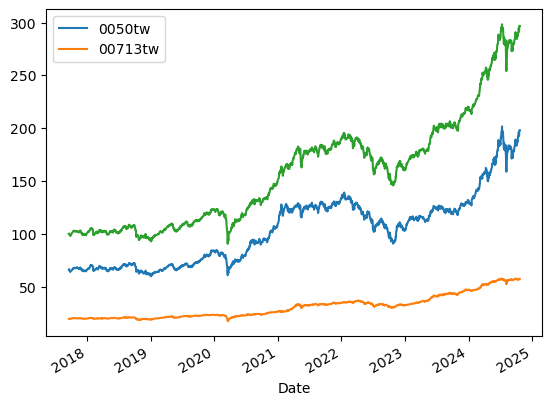

<Figure size 2000x500 with 0 Axes>

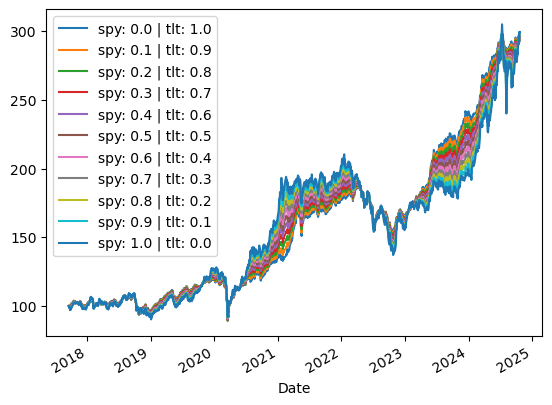

In [1]:
import ffn
prices = ffn.get("0050.TW,00713.TW", )
prices.plot()

prices.rebase().mean(axis=1).plot()


import numpy as np
import pandas as pd

strategies = {}

for i in np.arange(0, 1.1, 0.1):
    title = "spy: %.1f | tlt: %.1f" % (i, 1-i)
    strategies[title] = (prices.rebase() * [i, 1-i]).mean(axis=1).rebase()

strategies = pd.DataFrame(strategies)



import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))  # 10 是寬度，5 是高度
strategies.plot()

In [2]:
stats = strategies.calc_stats()
stats = pd.DataFrame(
    {
        name:pd.Series({key:getattr(pf, key) for key in dir(pf) if isinstance(getattr(pf, key), float)}, name=name) 
        for name,pf in stats.items()
    }).transpose()

stats.head()



,avg_down_month,avg_drawdown,avg_drawdown_days,avg_up_month,best_day,best_month,best_year,cagr,calmar,daily_kurt,...,worst_day,worst_month,worst_year,yearly_kurt,yearly_mean,yearly_sharpe,yearly_skew,yearly_sortino,yearly_vol,ytd
spy: 0.0 | tlt: 1.0,-0.027545,-0.020423,23.210526,0.032799,0.052632,0.116519,0.462628,0.164338,0.636979,12.334216,...,-0.071923,-0.122076,-0.072513,-0.552284,0.178661,0.953708,-0.003538,6.343349,0.187333,0.217952
spy: 0.1 | tlt: 0.9,-0.028909,-0.020325,22.958763,0.032448,0.055398,0.115753,0.444786,0.164650,0.633653,11.801566,...,-0.070547,-0.124025,-0.089494,-0.637625,0.179445,0.958854,-0.302169,5.250036,0.187146,0.241971
spy: 0.2 | tlt: 0.8,-0.028191,-0.019526,21.803922,0.033267,0.058146,0.116541,0.426751,0.164963,0.630423,11.058928,...,-0.069175,-0.125960,-0.106037,-0.652424,0.180431,0.957417,-0.577459,4.494967,0.188456,0.266860
spy: 0.3 | tlt: 0.7,-0.028051,-0.019465,21.371429,0.034397,0.060877,0.117327,0.408521,0.165274,0.627285,10.218796,...,-0.067809,-0.127883,-0.122160,-0.600928,0.181619,0.949576,-0.808085,3.947527,0.191263,0.292667
spy: 0.4 | tlt: 0.6,-0.028155,-0.020486,21.692308,0.035712,0.063590,0.118111,0.390091,0.165586,0.624237,9.375657,...,-0.069189,-0.129794,-0.137879,-0.500782,0.183011,0.935921,-0.979303,3.535426,0.195541,0.319443


In [3]:
stats.columns

Index(['avg_down_month', 'avg_drawdown', 'avg_drawdown_days', 'avg_up_month',
       'best_day', 'best_month', 'best_year', 'cagr', 'calmar', 'daily_kurt',
       'daily_mean', 'daily_sharpe', 'daily_skew', 'daily_sortino',
       'daily_vol', 'five_year', 'incep', 'max_drawdown', 'monthly_kurt',
       'monthly_mean', 'monthly_sharpe', 'monthly_skew', 'monthly_sortino',
       'monthly_vol', 'mtd', 'one_year', 'pos_month_perc', 'rf', 'six_month',
       'ten_year', 'three_month', 'three_year', 'total_return',
       'twelve_month_win_perc', 'win_year_perc', 'worst_day', 'worst_month',
       'worst_year', 'yearly_kurt', 'yearly_mean', 'yearly_sharpe',
       'yearly_skew', 'yearly_sortino', 'yearly_vol', 'ytd'],
      dtype='object')

<Axes: >

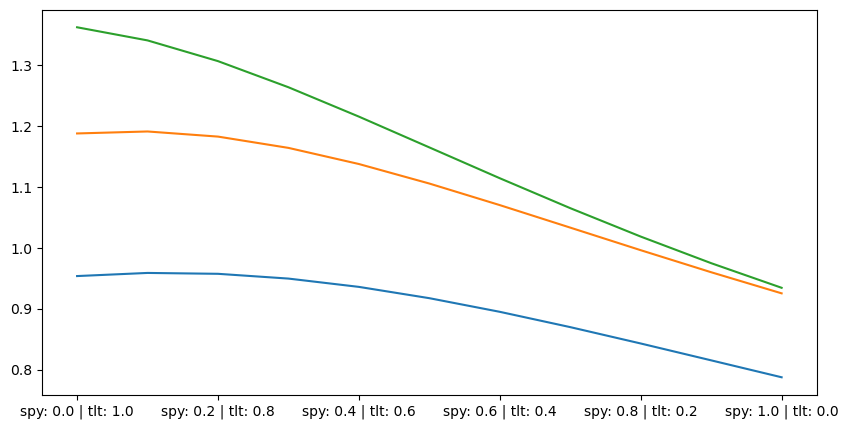

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))  # 10 是寬度，5 是高度

stats['yearly_sharpe'].plot()
stats['monthly_sharpe'].plot()
stats['daily_sharpe'].plot()

In [7]:
stats['yearly_mean']

spy: 0.0 | tlt: 1.0    0.047803
spy: 0.1 | tlt: 0.9    0.058183
spy: 0.2 | tlt: 0.8    0.066909
spy: 0.3 | tlt: 0.7    0.074641
spy: 0.4 | tlt: 0.6    0.081784
spy: 0.5 | tlt: 0.5    0.088607
spy: 0.6 | tlt: 0.4    0.095310
spy: 0.7 | tlt: 0.3    0.102054
spy: 0.8 | tlt: 0.2    0.108983
spy: 0.9 | tlt: 0.1    0.116236
spy: 1.0 | tlt: 0.0    0.123959
Name: yearly_mean, dtype: float64